<a href="https://colab.research.google.com/github/l12maro/lenguaje_claro_cyc_2/blob/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [ ]:
!pip install textstat

In [ ]:
#Importamos las librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import textstat
import re

In [ ]:
url = 'https://www.huelva.es/' #indicamos la URL de la que queremos extraer textos

In [ ]:
def clean_text(text):
  """
  This function takes a text and does some precleaning like removing double spaces or line breaks.
  """
  if text:
    text = re.sub('[ +|\n|\t]', ' ', text) # remove double spaces
    text = text.encode('utf-8').decode('utf-8')
  return text

In [ ]:
#Descargamos los textos y los guardamos en una tabla

response = requests.get(url)

# Use verify=False to override SSL certificate error if you trust the page
#response = requests.get(url, verify=False)
soup = BeautifulSoup(response.content, 'html.parser')

# Extracting all the links from the page
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

texts = []
for link in links[0:10]: #ponemos un índice para probar con los 10 primeros enlaces. Podemos quitarlo luego para descargar el sitio completo.
    if link is not None:# and link.startswith("/"):
        full_url = url + link
        response = requests.get(full_url)
        # Use verify=False to override SSL certificate error if you trust the page
        # response = requests.get(full_url, verify=False)

        # Skip non successful status code
        if response.status_code == 200: # Check if the response was successful (status code 200)
          soup = BeautifulSoup(response.content, 'html.parser')
          # Extracting all the text from the page
          text = soup.get_text()
          text = clean_text(text)
          if text:
              texts.append(text)
          #else:
          #    texts.append("")  # add empty string when no text is found

df = pd.DataFrame()
df['links'] = pd.Series(links)
df['texts'] = pd.Series(texts)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.huelva.es'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.huelva.es'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.huelva.es'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: I

In [ ]:
df = df.dropna() #eliminamos filas vacías

In [ ]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num oraciones,num palabras,palabras/oración,fdz huerta,tiempo lectura
0,#main-content,Portada Ayuntamiento de Huelva...,9,400,44.444444,47.55,34.43
1,/portal/es,Portada Ayuntamiento de Huelva...,9,400,44.444444,47.55,34.43
2,https://sede.huelva.es,Formularios Ayuntamiento de Hu...,16,388,24.250000,62.05,36.21
3,http://turismo.huelva.es,¿Te podemos ayudar? Ayuntamien...,17,436,25.647059,66.73,39.38
4,/portal/es/paginas/formularios,Alcaldesa Ayuntamiento de Huel...,10,387,38.700000,53.37,33.67


<Axes: >

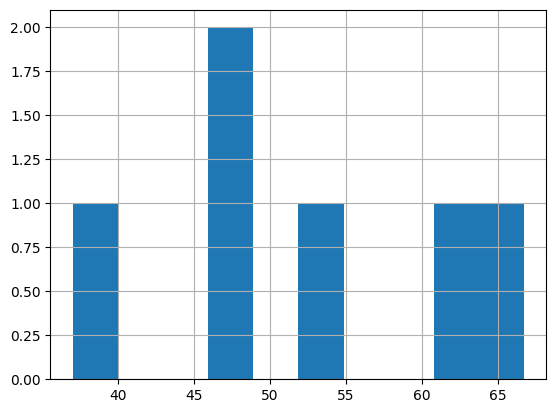

In [ ]:
df['fdz huerta'].hist()

In [ ]:
#Guardamos la tabla en un fichero csv
df.to_csv("AyuntamientoHuelva.csv")

In [ ]:
print ('media de oraciones por archivo:')
print (round (df['num oraciones'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
11.0
media de nivel de lectura:
52.0
media de tiempo de lectura (segundos):
34.0


<Axes: >

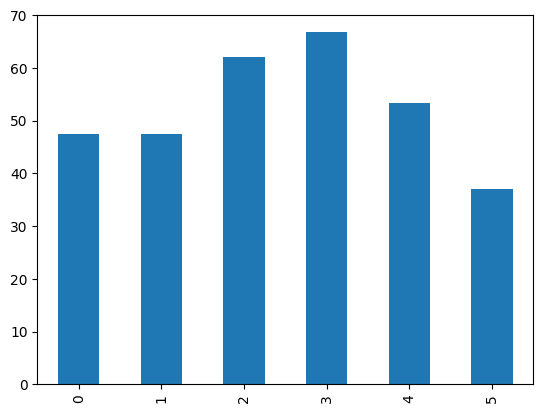

In [ ]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>